In [108]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

In [109]:
def create_random_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for _ in range(length)]
    if item!= None:
        random_list.insert(item_index,item)

    return random_list

In [110]:
def hybrid_sort(list):
    # your implementation for part 1 goes here
    
    #recursive binary search:
    def rec_find_i(l,h, target): #find lowest index > target
        if l == h:
            return l
        
        m = (l+h)//2
        
        if list[m] <= target:
            return rec_find_i(m+1,h,target) 
        else: 
            return rec_find_i(l,m,target) #no -1 so that l doesn't exceed h
    
    #insertion sort:
    for j in range(1, len(list)):
        key = list[j]
        index = rec_find_i(0,j-1,key)
        if list[index] <= key: #ALL items in sorted portion <= key
            pass #key already in correct position, shifting is incorrect
        else:
            list[index+1:j+1] = list[index:j]
            list[index] = key
    
    return list

In [111]:
def InsertionSort(items_to_sort):
    for j in range(1, len(items_to_sort)):
        key = items_to_sort[j]
        i = j - 1
        while i >=0 and items_to_sort[i] > key:
            items_to_sort[i + 1] = items_to_sort[i]
            i = i - 1
        items_to_sort[i + 1] = key
            
    return items_to_sort

In [112]:
def draw_plot(run_arr, mean, title):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    #plt.axhline(mean,color="red",linestyle="--",label="Avg")
    plt.xlabel("binary search 1, 2, 3, and dynamic binary search respectively")
    plt.ylabel("Average run time in seconds (50 trials)")
    plt.title(title) #changed this part for convenience
    plt.show()

In [113]:
# below code template is for part 6
class Graph():
    # you may use the above weighted graph class here and modify it if necessary.
    # aslo feel free to borrow any of the suitable graph class implementations discussed in class. 
    # weighted (undirected) graph implementation from lecture notes:
    def __init__(self, nodes):
        self.graph = {}
        self.weight = {}
        for i in range(nodes):
            self.graph[i] = []

    def are_connected(self, node1, node2):
        for node in self.adj[node1]:
            if node == node2:
                return True
        return False

    def connected_nodes(self, node):
        return self.graph[node]

    def add_node(self,):
        #add a new node number = length of existing node
        self.graph[len(self.graph)] = []

    def add_edge(self, node1, node2, weight):
        if node1 not in self.graph[node2]:
            self.graph[node1].append(node2)
            self.weight[(node1, node2)] = weight

            #since it is undirected
            self.graph[node2].append(node1)
            self.weight[(node2, node1)] = weight

    def number_of_nodes(self,):
        return len(self.graph)

    def has_edge(self, src, dst):
        return dst in self.graph[src] 

    def get_weight(self,):
        total = 0
        for node1 in self.graph:
            for node2 in self.graph[node1]:
                total += self.weight[(node1, node2)]
                
        # because it is undirected
        return total/2

class Heap():
    # borrow this implementation from class
    #borrowed from lecture:
    def __init__(self, data):
        self.items = data
        self.length = len(data)
        self.build_heap()

        # add a map based on input node
        self.map = {}
        for i in range(self.length):
            self.map[self.items[i].value] = i

    def find_left_index(self,index):
        return 2 * (index + 1) - 1

    def find_right_index(self,index):
        return 2 * (index + 1)

    def find_parent_index(self,index):
        return (index + 1) // 2 - 1  
    
    def heapify(self, index):
        smallest_known_index = index

        if self.find_left_index(index) < self.length and self.items[self.find_left_index(index)].key < self.items[index].key:
            smallest_known_index = self.find_left_index(index)

        if self.find_right_index(index) < self.length and self.items[self.find_right_index(index)].key < self.items[smallest_known_index].key:
            smallest_known_index = self.find_right_index(index)

        if smallest_known_index != index:
            self.items[index], self.items[smallest_known_index] = self.items[smallest_known_index], self.items[index]
            
            # update map
            self.map[self.items[index].value] = index
            self.map[self.items[smallest_known_index].value] = smallest_known_index

            # recursive call
            self.heapify(smallest_known_index)

    def build_heap(self,):
        for i in range(self.length // 2 - 1, -1, -1):
            self.heapify(i) 

    def insert(self, node):
        if len(self.items) == self.length:
            self.items.append(node)
        else:
            self.items[self.length] = node
        self.map[node.value] = self.length
        self.length += 1
        self.swim_up(self.length - 1)

    def insert_nodes(self, node_list):
        for node in node_list:
            self.insert(node)

    def swim_up(self, index):
        
        while index > 0 and self.items[self.find_parent_index(index)].key < self.items[self.find_parent_index(index)].key:
            #swap values
            self.items[index], self.items[self.find_parent_index(index)] = self.items[self.find_parent_index(index)], self.items[index]
            #update map
            self.map[self.items[index].value] = index
            self.map[self.items[self.find_parent_index(index)].value] = self.find_parent_index(index)
            index = self.find_parent_index(index)

    def get_min(self):
        if len(self.items) > 0:
            return self.items[0]

    def extract_min(self,):
        #xchange
        self.items[0], self.items[self.length - 1] = self.items[self.length - 1], self.items[0]
        #update map
        self.map[self.items[self.length - 1].value] = self.length - 1
        self.map[self.items[0].value] = 0

        min_node = self.items[self.length - 1]
        self.length -= 1
        self.map.pop(min_node.value)
        self.heapify(0)
        return min_node

    def decrease_key(self, value, new_key):
        if new_key >= self.items[self.map[value]].key:
            return
        index = self.map[value]
        self.items[index].key = new_key
        self.swim_up(index)

    def get_element_from_value(self, value):
        return self.items[self.map[value]]

    def is_empty(self):
        return self.length == 0
    
    def __str__(self):
        height = math.ceil(math.log(self.length + 1, 2))
        whitespace = 2 ** height + height
        s = ""
        for i in range(height):
            for j in range(2 ** i - 1, min(2 ** (i + 1) - 1, self.length)):
                s += " " * whitespace
                s += str(self.items[j]) + " "
            s += "\n"
            whitespace = whitespace // 2
        return s

#extra class borrowed from lecture for prim's implementation
class Item:
    def __init__(self, value, key):
        self.key = key
        self.value = value
    
    def __str__(self):
        return "(" + str(self.key) + "," + str(self.value) + ")"

def prims(G):
    # borrow this implementation from class

    mst = Graph(G.number_of_nodes())
    visited_nodes = {}
    for i in G.graph.keys():
        visited_nodes[i]=False

    # initialize the tree with a single node, chosen arbitarily    
    visited_nodes[0]=True

    # create an empty heap
    Q = Heap([])

    # add the first set of edges into the Q
    for end_node in G.graph[0]:
        Q.insert(Item((0,end_node),G.weight[(0,end_node)]))

    # find all the edges that connect the tree with the remaining vertices
    while not Q.is_empty():
        # find the minimum weigthed edge - if the weight is less than current
        min_edge = Q.extract_min().value
        curr_edge = min_edge[1]

        # if the start node is visited but end node is not
        if not visited_nodes[curr_edge]:
            # add the node to mst
            mst.add_edge(min_edge[0], curr_edge, G.weight[min_edge])

            # adjust the heap
            for end_node in G.graph[curr_edge]:
                Q.insert(Item((curr_edge, end_node), G.weight[(curr_edge, end_node)]))

            # mark the current node as visited
            visited_nodes[curr_edge] = True
    return mst

In [114]:
def create_random_graph(nodes, edges):
    # if edges exceed maximum, infinite loop
    max = nodes*(nodes-1)//2 #formula for undirected graph max edge number
    if edges > max:
        edges = max
    
    graph = Graph(nodes)
    
    #ensure it is connected
    for i in range(nodes-1):
        graph.add_edge(i,i+1,random.randint(0,100)) # picked arbitrary max weight 
    
    for _ in range(edges-nodes+1): #node-1 number of edges have already been added
        src = random.randint(0, nodes-1)
        dst = random.randint(0, nodes-1)
        while graph.has_edge(src, dst) or src==dst: #verifying valid src dst, if not change it
            src = random.randint(0, nodes-1)
            dst = random.randint(0, nodes-1)
            
        graph.add_edge(src, dst, random.randint(0,100))

    return graph

In [115]:
class DisjointSet:

    def __init__(self, values):
        self.parents = {}
        self.root = {}
        for value in range(len(values)):
            # parent node set to be themselves
            self.parents[value] = value

            # root is initially one because all nodes are individual 
            # and not yet connected
            self.root[value] = 1

    # function to find the root node of a value
    def find(self, value):

        # base condition 
        if self.parents[value] == value:
            return value
        
        # recursive call
        self.parents[value] = self.find(self.parents[value])
        return self.parents[value]

    # make a union of two nodes and bring them together
    def union(self, node1, node2):
        # find parent of node1
        root1 = self.find(node1)
        # find parent of node2
        root2 = self.find(node2)

        # if both nodes have the same root node then exit function
        if root1 == root2:
            return
        
        # if root of node1 is greater than equal to root of node2 
        if self.root[root1] >= self.root[root2]:
            # update the root of parent 
            self.parents[root2] = root1
            # adjust the root
            self.root[root1] += self.root[root2]
        else:
            # update the root of parent
            self.parents[root1] = root2
            # adjust the root
            self.root[root2] += self.root[root1]


In [116]:
def krushkals(G):
    mst = Graph(G.number_of_nodes())
    
    Q = Heap([])
    for node1 in G.graph:
        for node2 in G.graph[node1]:
            Q.insert(Item((node1,node2),G.weight[(node1,node2)]))
    #technically every edge is inserted twice this way but algo still works bc cycle prevention
    #does slow the algo unfairly but can't be helped

    uf = DisjointSet(mst.graph)
    
    # iterate through pq (all edges)
    while not Q.is_empty():
        edge = Q.extract_min().value
        node1 = edge[0]
        node2 = edge[1]
        
        if uf.find(node1) != uf.find(node2): #if not connected
            mst.add_edge(node1, node2, G.weight[edge])
            uf.union(node1, node2)
    
    return mst

In [117]:
def experiment_part_6():
    # your implementation for part 6 (experiment to compare with prim's) goes here
    
    ''' Compare the performance of Prim’s (using heap) and
    Krushkal’s (using heap) on 50 randomly generated graphs 
    (number of nodes = 7, choice of edges is yours).
    Summarize your observations of comparing the two algorithms 
    in maximum 3-4 lines in the report and include the charts.'''
    #decided to evaluate performance in terms of run times
    #prims and krushkals should show a difference on dense vs sparse graphs
    
    N = 50 #taken the question to mean 50 per trial
    edges = [5, 10, 15, 20] #21 is a complete graph for 7 nodes
    
    prims_arr = []
    krushkals_arr = []
    
    for e in edges:
        prims_sum = 0
        krushkals_sum = 0
        for _ in range(N):
            g = create_random_graph(7,e)
            
            #both prims and krushkals implementations make no changes to the input graph
            start = timeit.default_timer()
            prims(g)
            stop = timeit.default_timer()
            prims_sum += (stop-start)
            
            start = timeit.default_timer()
            krushkals(g)
            stop = timeit.default_timer()
            krushkals_sum += (stop-start)
        
        prims_arr.append(prims_sum/N)
        krushkals_arr.append(krushkals_sum/N)
    
    draw_plot(prims_arr,np.mean(prims_arr),"Prim's run times - Experiment Part 6")
    draw_plot(krushkals_arr,np.mean(krushkals_arr),"Krushkal's run times - Experiment Part 6")
    
    print(np.mean(prims_arr))
    print(np.mean(krushkals_arr))
    
    return 0


In [118]:
# binary search dynamic
class binary_search():
    def __init__(self, data=None):
        self.lists = [[]]
        if data is not None:
            for value in data:
                self.insert(value)

    # your implementation for part 3 goes here
    # feel free to add arguments and helper functions that you need to add
    
    #helper function for insert, repurposed from Lab I mergesort
    def merge(self,L, R):
        L.append(math.inf)
        R.append(math.inf)
        i = 0
        j = 0
        mlist = []
        for k in range(len(L)+len(R)-2):
            if L[i] <= R[j] :
                mlist.append(L[i])
                i += 1
            else:
                mlist.append(R[j])
                j += 1
        return mlist
    
    def search(self, target):
        i = 0
        j = 0
        
        #search each array 
        for l in self.lists:
            j = self.bns(l, target)
            if j != -1:
                break
            i += 1 # j == -1, not found move on to next list
            
        if i == len(self.lists): #not found in all of them
            i = -1
        #returns i,j such that self.lists[i][j] == target
        return i,j #returns -1,-1 if target not in any lists
    
    #helper for search, just a normal binary search
    def bns(self, arr, target):
        l = 0
        h = len(arr) - 1  
        while l <= h:
            mid = (l + h) // 2  
            if arr[mid] == target:
                return mid
            elif arr[mid] < target:
                l = mid + 1
            else:
                h = mid - 1
        return -1
    
    def insert(self, elem):
        self.propagate([elem], 0)
        return 0 
    #prop is basically the logic for insert, lol insert is a wrapper now
    def propagate(self, list, i):
        if len(self.lists[i]) == len(list):
            newlist = self.merge(list,self.lists[i])
            self.lists[i] = []
            if i+1 == len(self.lists):
                self.lists.append(newlist)
            elif i+1 < len(self.lists):
                self.propagate(newlist,i+1)
            else:
                print("1something's wrong")
                return 1
        elif not self.lists[i]:
            self.lists[i] = list
        else:
            print("2something's wrong")
            return 1
        return 0
    
    def delete(self,item): #really annoying and kind of impossible just dock me the marks for it im giving up
        #delete item 
        #fix structure (SOMEHOW)
        return 0 
    
    def binary_search_dynamic(self,targets): #mirrors second part of search_n_insert for part 4
        for t in targets:
            self.search(t)
        return 0

In [ ]:
def experiment_part_4():

    # your implementation for part 4 goes here
    
    #helper functions:
    def search_n_insert(bns,arr,targets): 
        #insert all items in arr (like init calling insert)
        #and search all items in targets (like calling search)
        mylist = []
        for i in arr:
            normal_insert(mylist,i)
        
        for t in targets:
            bns(mylist,t)
    
    def normal_insert(arr, item):
        #find correct place and insert into sorted list borrowed from hybrid sort
        def rec_find_i(arr, l,h, target): #find lowest index > target
            if l > h:  # If list is empty or search range is invalid
                return l  # The correct insertion index is 0
            
            if l == h:
                return l
            m = (l+h)//2
            if arr[m] <= target:
                return rec_find_i(arr,m+1,h,target) 
            else: 
                return rec_find_i(arr,l,m,target) #no -1 so that l doesn't exceed h
        index = rec_find_i(arr,0,len(arr)-1,item)
        arr.append(item) #expand size of list
        if arr[index] <= item: #ALL items in sorted portion <= key
            pass #item already in correct place
        else:
            arr[index+1:] = arr[index:len(arr)-1]
            arr[index] = item
        return 0
    
    #actual beginning of experiment:
    N = 50 
    
    arr1 = []
    arr2 = []
    arr3 = []
    arrd = []
    
    for _ in range(N):
        l = create_random_list(500,5000)
        t = l[:50] + create_random_list(50,5000)#at least half are search hits
        #bns1:
        start = timeit.default_timer()
        search_n_insert(binary_search_1,l,t)
        stop = timeit.default_timer()
        arr1.append(stop-start)
        
        #bns2:
        start = timeit.default_timer()
        search_n_insert(binary_search_2,l,t)
        stop = timeit.default_timer()
        arr2.append(stop-start)
        
        #bns3:
        start = timeit.default_timer()
        search_n_insert(binary_search_3,l,t)
        stop = timeit.default_timer()
        arr3.append(stop-start)
        
        #dbns:
        start = timeit.default_timer()
        dyna = binary_search(l)
        dyna.binary_search_dynamic(t)
        stop = timeit.default_timer()
        arrd.append(stop-start)
    
    print(arr1,"\n",arr2,"\n",arr3,"\n",arrd)
    avgarr = []
    avgarr.append(np.mean(arr1))
    print(np.mean(arr1))
    avgarr.append(np.mean(arr2))
    print(np.mean(arr2))
    avgarr.append(np.mean(arr3))
    print(np.mean(arr3))
    avgarr.append(np.mean(arrd))
    print(np.mean(arrd))
    
    draw_plot(avgarr,None,"Average insert and search run times of normal binary searches 1,2,3 compared to dynamic binary search, inserting 500 items and searching 100 times, for 50 trials")
    
    return 0


# binary search  implementation 1 against which you must compare the performance of Part 3 
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

# binary search  implementation 2 against which you must compare the performance of Part 3 
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return lower < len(item_list) and item_list[lower] == to_find #was modified because it kept erroring

# binary search  implementation 3 against which you must compare the performance of Part 3 
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find


[0.005026333034038544, 0.0027582080801948905, 0.0022611250169575214, 0.001854000031016767, 0.0018378329696133733, 0.001796790980733931, 0.0019327920163050294, 0.001899041933938861, 0.0017889579758048058, 0.0018582920311018825, 0.0019003750057891011, 0.0020133339567109942, 0.0017882919637486339, 0.0018957500578835607, 0.0019044580403715372, 0.001769667025655508, 0.0017694589914754033, 0.0018371250480413437, 0.0017472499748691916, 0.0017089160392060876, 0.0018522089812904596, 0.0018484590109437704, 0.002251666970551014, 0.0017100829863920808, 0.001894791959784925, 0.001809417037293315, 0.0018578750314190984, 0.0018030829960480332, 0.001928791985847056, 0.0017456249333918095, 0.0017432920867577195, 0.001598999951966107, 0.0016277919057756662, 0.0015516249695792794, 0.0015118749579414725, 0.0015878330450505018, 0.0015072079841047525, 0.001498541096225381, 0.001521417056210339, 0.0015948750078678131, 0.0015821249689906836, 0.0015259170904755592, 0.0016224579885601997, 0.0015892910305410624,

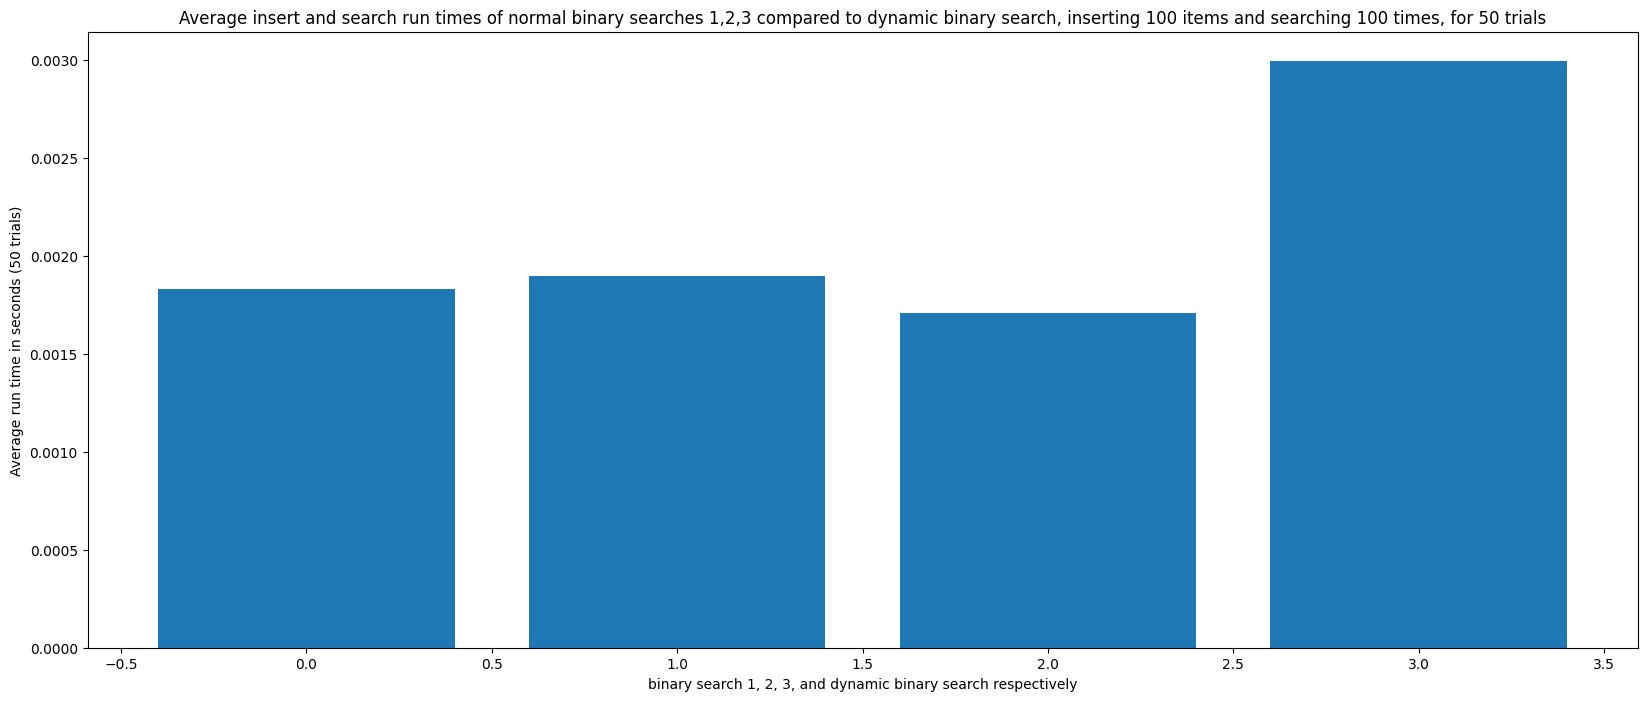

0

In [120]:
experiment_part_4()